In [94]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from knn import KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [95]:
male_data= pd.read_csv("G:/PROJECT/42- assignment42/ANSUR_II_MALE_Public.csv", encoding= 'latin-1')

male_data.head()


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [96]:
female_data= pd.read_csv("G:/PROJECT/42- assignment42/ANSUR_II_FEMALE_Public.csv", encoding= 'latin-1')

female_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [97]:
data= pd.concat([male_data, female_data])

In [98]:
data['weightkg']= data["weightkg"] / 10
data["stature"]= data["stature"] / 10
data["Gender"]= data["Gender"].replace(['Female', 'Male'], [0, 1])

In [99]:
df1= data.query("Gender== 0")['stature']
df2= data.query("Gender== 1")['stature']

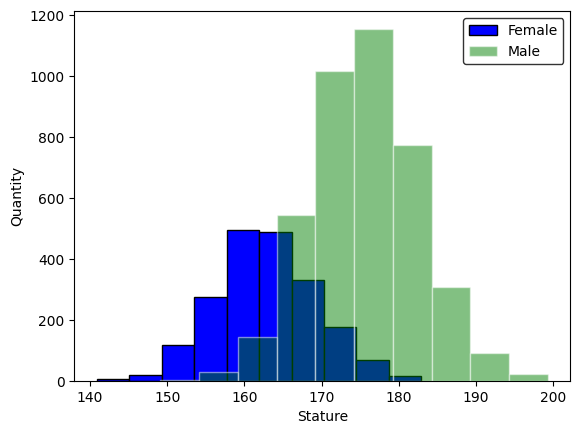

In [100]:
plt.hist(df1, color= 'b', edgecolor= 'black')
plt.hist(df2, color= 'g', edgecolor= 'white', alpha= 0.49)
plt.xlabel('Stature')
plt.ylabel('Quantity')
plt.legend(['Female', 'Male'], edgecolor= 'black')
plt.show()


In [101]:
women_stature= data.query('Gender== 0')['stature'].mean()
women_stature

162.84733131923463

In [102]:
men_stature= data.query('Gender== 1')['stature'].mean()
men_stature

175.62146006859385

In [103]:
training_data, testing_data= train_test_split(data[['weightkg', 'stature', 'Gender']], test_size= 0.2, random_state= 50)

training_data

,weightkg,stature,Gender
840,93.9,171.6,1
2833,78.7,175.3,1
1653,83.5,187.2,1
860,56.3,162.3,0
1162,63.0,160.8,0
...,...,...,...
132,78.2,174.6,1
2014,100.5,181.1,1
1931,77.1,170.8,1
1518,70.8,161.2,0


In [104]:
X_train  = data[["stature" , "weightkg"]] 
X_train = np.array(X_train)
X_test  = data[["stature" , "weightkg"]] 
X_test = np.array(X_test)
Y_train = data['Gender']
Y_train = np.array(Y_train)
Y_test = data["Gender"]
Y_test = np.array(Y_test)

test1 = np.array([180.2 , 85.1])
test2 = np.array([175.7  , 79.1])
test3 = np.array([180.4 , 90.5])
test4 = np.array([170 , 70])

knn = KNN(3)
knn.fit(X_train , Y_train)

listof_new_persons  = [test1 ,test2 , test3 , test4]
outputs = knn.predict(listof_new_persons)
for output in outputs :
    if output == 0 :
        print("WOMAN".capitalize())
    elif output == 1 :
        print("MAN".capitalize())

Man
Man
Man
Woman


In [105]:
y_test=data['Gender'].to_numpy()
for k in [3, 7, 10, 13, 16]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data[['weightkg','stature']], data['Gender'])
    y_preds = knn.predict(data[['weightkg','stature']])
    score = np.sum(y_preds == y_test) / y_preds.shape[0]
    print(f'Score in k = {k} is {score*100:.1f}%.')

Score in k = 3 is 89.4%.
Score in k = 7 is 87.2%.
Score in k = 10 is 86.8%.
Score in k = 13 is 86.5%.
Score in k = 16 is 86.1%.


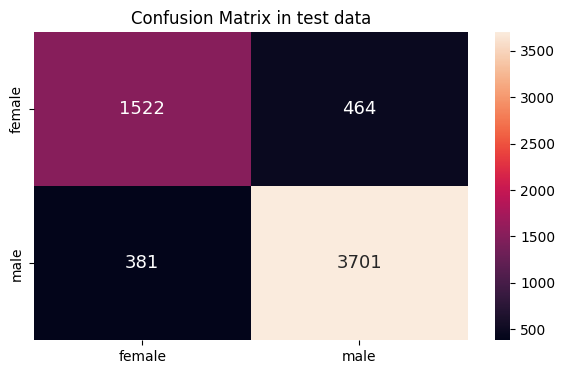

In [106]:
import seaborn as sb
cm = confusion_matrix(Y_test, y_preds)
cm_df = pd.DataFrame(cm,
                     index = ['female','male'], 
                     columns = ['female','male'])
plt.figure(figsize=(7,4))
plt.title('Confusion Matrix in test data')
sb.heatmap(cm_df, annot=True, fmt='d', annot_kws={'size':13}, color= 'blue')
plt.show()